In [12]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")


Линейные модели дают прогноз, используя линейную функцию(linear function)входных признаков, о которой мы расскажем ниже.

w[0]: 0.393906  b: -0.031804


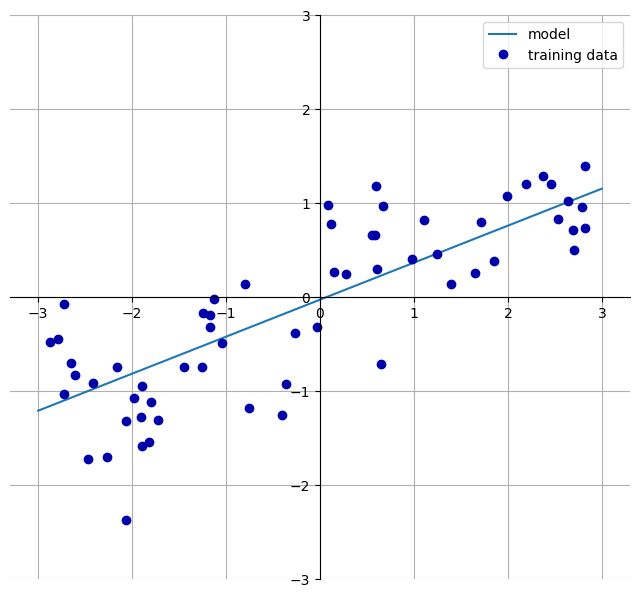

In [13]:

# лин. модель регрессии -вычисляем w и b
mglearn.plots.plot_linear_regression_wave()
plt.show()


Линейные модели для регрессии можно охарактеризовать как регрессионные модели, в которых прогнозом является прямая линия для одного признака, плоскость, когда используем два признака, 
Мы видвигаем сильное (и в некоторой степени нереальное) предположение, что наша целевая переменная у является линейной комбинацией признаков. Однако анализ одномерных данных дает несколько искаженную картину. Для наборов данных с большим количеством признаков линейные модели могут быть очень полезны. В частности, если у вас количество признаков превышает количество точек данных для обучения, любую целевую переменную у можно прекрасно смоделировать (на обучающей выборке) в виде линейной функции.
Существует различные виды линейных моделей для регрессии. Различие между этими моделями заключается в способе оценивания параметров модели wи bпо обучающим данным и контроле сложности модели. Теперь мы рассмотрим наиболее популярные линейные модели для регрессии



In [14]:

# метод наим. квадратов
from sklearn.linear_model import LinearRegression, Ridge
X, y = mglearn.datasets.make_wave(n_samples=60)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)


Линейная регрессияили обычный метод наименьших квадратов(ordinary least squares, OLS)–это самый простой и наиболее традиционный метод регрессии.
Линейная регрессия находит параметры wи b, которые минимизируют среднеквадратическую ошибку(mean squared error)между спрогнозированными и фактическими ответами у в обучающем наборе.
Среднеквадратичная ошибкаравна сумме квадратов разностей между спрогнозированными и фактическими значениями. Линейная регрессия проста, что является преимуществом, но в то же время у нее нет инструментов, позволяющих контролировать сложность модели.

In [15]:


print("lr.coef_: {}".format(lr.coef_))#параметр w - массив
print("lr.intercept_: {}".format(lr.intercept_))#параметр b -число с плавающей точкой


lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


Параметры «наклона» (w), также называемые весами или коэффициентами(coefficients), хранятся в атрибуте coef_, тогда как сдвиг(offset)или константа(intercept), обозначаемая как b, хранится в атрибуте intercept_
Атрибут intercept_-это всегда отдельное число с плавающей точкой, тогда как атрибут coef_-это массив NumPy, в котором каждому элементу соответствует входной признак. Поскольку в наборе данных wave используется только один входной признак, lr.coef_ содержит только один элемент

In [16]:

print("\nПравильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))




Правильность на обучающем наборе: 0.67
Правильность на тестовом наборе: 0.66


In [17]:


X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("\nПравильность на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))



Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.61


Это несоответствие между правильностью на обучающем наборе и правильностью на тестовом наборе является явным признаком переобучения и поэтому мы должны попытаться найти модель, которая позволит нам контролировать сложность. Одна из наиболее часто используемых альтернатив стандартной линейной регрессии –гребневая регрессия, которую мы рассмотрим ниже.

In [18]:

# гребневая регрессия
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("\nПравильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))



Правильность на обучающем наборе: 0.89
Правильность на тестовом наборе: 0.75


Гребневая регрессиятакже является линейной моделью регрессии, поэтому ее формула аналогична той, что используется в обычном методе наименьших квадратов. В гребневой регрессии коэффициенты (w) выбираются не только с точки зрениятого, насколько хорошо они позволяют предсказывать на обучающих данных, они еще подгоняются в соответствии с дополнительным ограничением. Нам нужно, чтобы величина коэффициентов была как можно меньше. Другими словами, все элементы w должны быть близки к нулю. Это означает, что каждый признак должен иметь как можно меньшее влияние на результат (то есть каждый признак должен иметь небольшой регрессионный коэффициент)в то же время он должен по-прежнему обладать хорошей прогнозной силой.

Это ограничение является примером регуляризации(regularization). 
Регуляризация, использующаяся в гребневой регрессии, известна как L2 регуляризация.
Гребневая регрессии реализована в классе linear_model.Ridge

При использовании линейной регрессии мы получили переобучение.
Менее сложная модель означает меньшую правильность на обучающем наборе, но лучшую обобщающую способность

Компромисс между простотой модели и качеством работы на обучающем наборе может быть задан пользователем при помощи параметра alpha.

In [19]:
#компромис между простотой и качеством
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("\nПравильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))



Правильность на обучающем наборе: 0.79
Правильность на тестовом наборе: 0.64


In [20]:

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("\nПравильность на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))



Правильность на обучающем наборе: 0.93
Правильность на тестовом наборе: 0.77


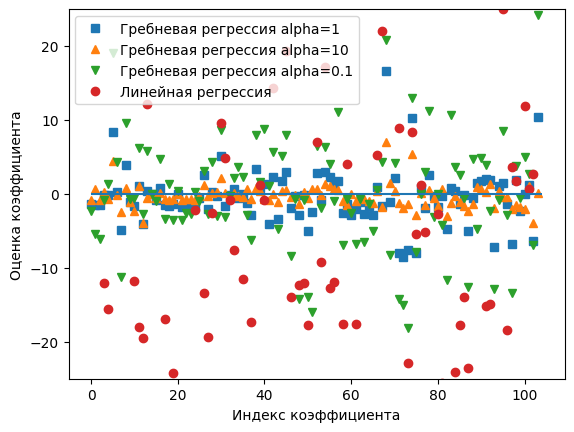

In [21]:

plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()


Увеличение alpha заставляет коэффициенты сжиматься до близких к нулю значений, что снижает качество работы модели на обучающем наборе, но может улучшить ее обобщающую способность
Уменьшая alpha, мы сжимаем коэффициенты в меньшей степени, что означает движение вправо на рис. 2.1. При очень малых значениях alpha, ограничение на коэффициенты практически не накладывается и мы в конечном итоге получаем модель,напоминающую линейную регрессию

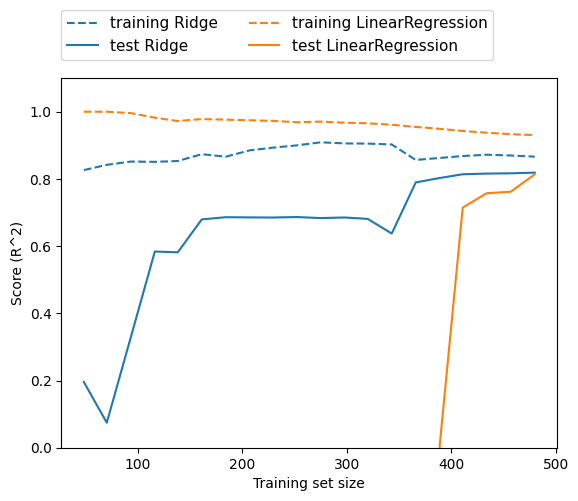

In [22]:

#кривые обучения
mglearn.plots.plot_ridge_n_samples()
plt.show()


Еще один способ понять влияние регуляризации заключается в том, чтобы зафиксировать значение alpha и при этом менять доступный объем обучающих данных.
графики, которые показывают качество работы модели в виде функции от объема набора данных, их еще называют кривыми обучения(learning curves)

Как и следовало ожидать, независимо от объема данных правильность на обучающем наборе всегда выше правильности на тестовом наборе, какслучае использования гребневой регрессии, так и в случае использования линейной регрессии. Поскольку гребневая регрессия –регуляризированная модель, во всех случаях на обучающем наборе правильность гребневой регрессии ниже правильности линейнойрегрессии. Однако правильность на тестовом наборе у гребневой регрессии выше, особенно для небольших подмножеств данных. При объеме данных менее 400 наблюдений линейная регрессия не способна обучиться чему-либо.

Урок здесь состоит в том, что при достаточном объеме обучающих данных регуляризация становится менее важной и при удовлетворительном объеме данных гребневая и линейная регрессии будут демонстрировать одинаковое качество работы (тот факт, что в данном случае это происходит при использовании полного набора данных, является просто случайностью)

In [23]:

# Лассо
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("\nПравильность на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("Правильность на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))



Правильность на обучающем наборе: 0.29
Правильность на контрольном наборе: 0.21
Количество использованных признаков: 4


Альтернативой Ridge как метода регуляризации линейной регрессии является Lasso. Как и гребневая регрессия, лассо также сжимает коэффициенты до близких к нулю значений, но несколько иным способом, называемым L1регуляризацией
Результат L1 регуляризации заключается в том, что при использовании лассо некоторые коэффициенты становятся равны точно нулю. Получается, что некоторые признаки полностью исключаются из модели. Это можно рассматривать как один из видов автоматическогоотбора признаков. Получение нулевых значений для некоторых коэффициентов часто упрощает интерпретацию модели и может выявить наиболее важные признаки вашей модели

In [24]:

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("\nПравильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))



Правильность на обучающем наборе: 0.90
Правильность на тестовом наборе: 0.77
Количество использованных признаков: 33


ак видно из сводки, Lasso дает низкую правильность как на обучающем, так и на тестовом наборе. Это указывает на недообучение и мы видим, что из 105 признаков используются только 4. Как и Ridge, Lasso также имеет параметр регуляризации alpha, который определяет степень сжатия коэффициентов до нулевых значений. В предыдущем примере мы использовали значение по умолчанию alpha=1.0. Чтобы снизить недообучение, давайте попробуем уменьшить alpha. При этом нам нужно увеличить значение max_iter (максимальное количество итераций)
Более низкое значение alpha позволило нам получить более сложную модель, которая продемонстрировала более высокую правильность на обучающем итестовом наборах. Лассо работает немного лучше, чем гребневая регрессия, и мы используем лишь 33 признака из 105. Это делает данную модель более легкой с точки зрения интерпретации.

In [25]:

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("\nПравильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))



Правильность на обучающем наборе: 0.95
Правильность на тестовом наборе: 0.64
Количество использованных признаков: 96


Однако, если мы установим слишком низкое значение alpha, мы снова нивелируем эффект регуляризации и получим в конечном итоге переобучение, придя к результатам, аналогичным результатам линейной регрессии:


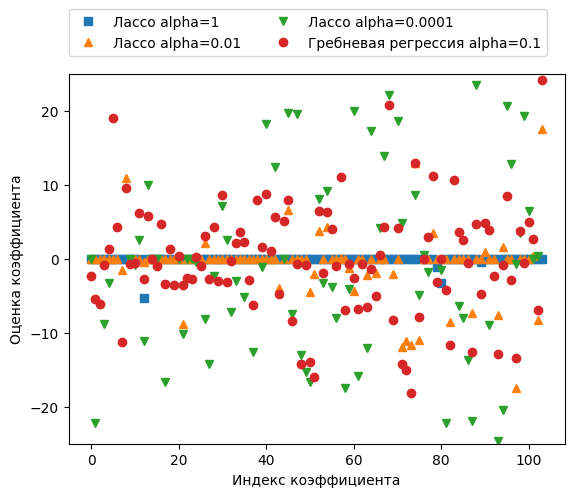

In [26]:


plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.show()


Для alpha=1 мы видим, что не только большинство коэффициентов равны нулю (что мы уже знали), но и остальные коэффициенты также малы по величине. Уменьшив alpha до 0.01, получаем решение, показанное в виде зеленых треугольников, большая часть коэффициентов для признаков становятся в точности равными нулю. При alpha=0.0001 мы получаем практически нерегуляризированную модель, у которой большинство коэффициентов отличны от нуля и имеют большие значения.

На практике, когда стоит выбор между гребневой регрессией и лассо, предпочтение, как правило, отдается гребневой регрессии. Однако, есливас есть большое количество признаков и есть основания считать, что лишь некоторые из них важны, Lasso может быть оптимальным выбором. Аналогично, если вам нужна легко интерпретируемая модель, Lasso поможет получить такуюмодель, так как она выберет лишь подмножество входных признаков. В библиотеке scikit-learn также имеется класс ElasticNet, который сочетает в себе штрафы Lasso и Ridge. На практике эта комбинация работает лучше всего, впрочем, это достигается за счет двухкорректируемых параметров: один для L1 регуляризации, а другой –для L2 регуляризации.
